In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
from scipy.interpolate import interp1d
plt.style.use('dark_background')
%matplotlib widget

In [6]:
path = r'C:\Users\Manvydas\Downloads\OneDrive_2023-09-28\1 praktinė užduotis Furjė analizė'
names = os.listdir(path)
namesspectra = [x for x in names if '.dat' in x or '.DPT' in x]
print(namesspectra)

['interf maza.dat', 'interferencija.dat', 'interferograma didele.DPT']


interf maza.dat


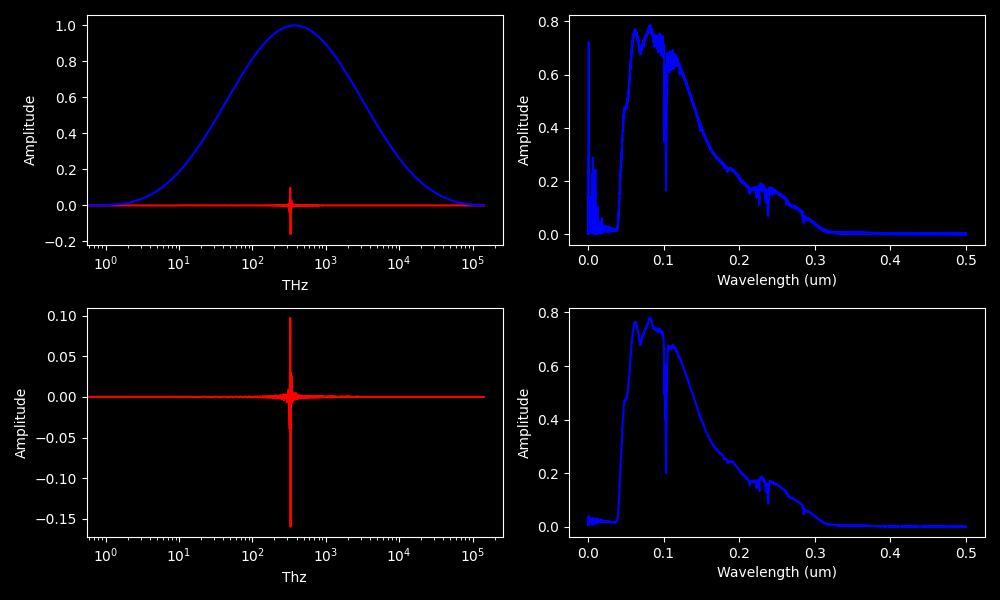

In [17]:
plt.close()
Y=0
x = namesspectra[Y]
print(x)
# get the sampling rate
sr = 1 
# Define the frequency range for the bandpass filter
low_freq = 280  # Lower frequency cutoff
high_freq = 405  # Upper frequency cutoff
# center = 280 + (355-280)/2

df = pd.DataFrame()
df = pd.read_csv(path + '\\' + x, delimiter="\t", decimal=".", names = ['a', 'b'])


dfs = df.copy()
N = dfs['a'].shape[-1]


# w = np.blackman(N)
# w = np.bartlett(N)
# w = np.hamming(N)
# w = np.hanning(N)
# w = np.kaiser(N, 50)


n = np.arange(N)
T = N/sr
freq = n/T

# print(yf)
# sig_fft_filtered[(freq < low_freq) | (freq > high_freq)] = 0

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
a = dfs['a'].iloc[0]
b = dfs['a'].iloc[-1]
# print(a, b, N)
xlog = np.logspace(np.log10(a+1), np.log10(b+1), N)

interpolator = interp1d(xlog, w, kind='linear', fill_value='extrapolate')
interpolated_values = interpolator(df['a'])
dfs['interpolated_func']=pd.Series(interpolated_values)
dfs['mod'] = dfs['b'] * dfs['interpolated_func']

sig_fft = fft(df['b'])
sig_fft_filtered = fft(dfs['mod'])

plt.figure(figsize = (10, 6))

plt.subplot(221)
plt.plot(df['a'], df['b'], 'r')
plt.plot(df['a'], interpolated_values, 'b')
plt.xlabel('THz')
plt.ylabel('Amplitude')
plt.xscale('log')

plt.subplot(222)
plt.plot(f_oneside, np.abs(sig_fft[:n_oneside]), 'b')
plt.xlabel('Wavelength (um)')
plt.ylabel('Amplitude')
# plt.yscale('log')
# plt.xlim(0, 10)

plt.subplot(223)
# plt.plot(df['a'], sig_fft_filtered, 'r')
plt.plot(dfs['a'], dfs['mod'], 'r')
plt.xlabel('Thz')
plt.ylabel('Amplitude')
plt.xscale('log')

plt.subplot(224)
plt.plot(f_oneside, np.abs(sig_fft_filtered[:n_oneside]), 'b')
plt.xlabel('Wavelength (um)')
plt.ylabel('Amplitude')
# plt.yscale('log')
plt.tight_layout()
plt.show()


interferencija.dat


C:\Users\Manvydas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


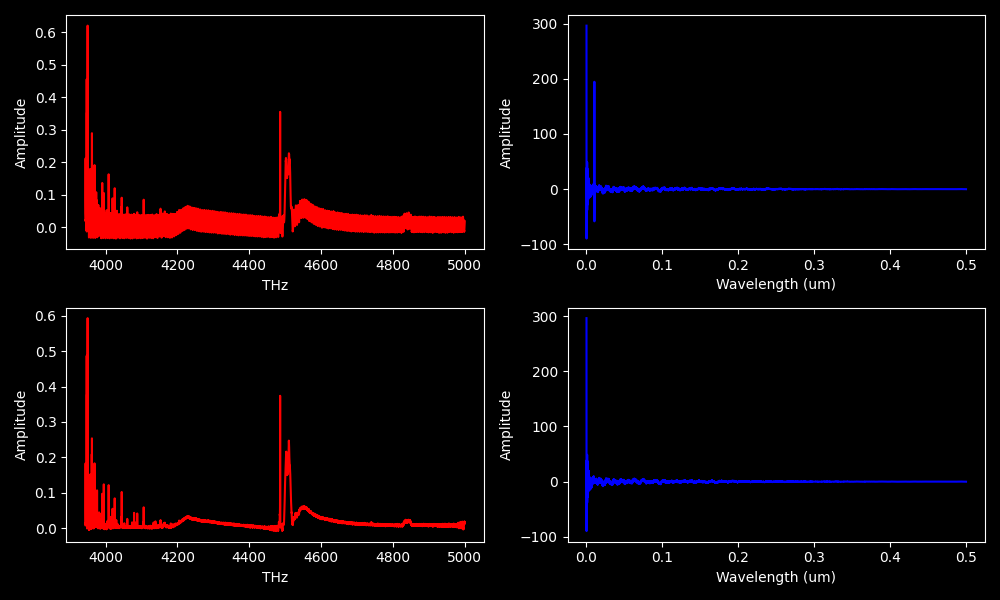

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, irfft

Y=1
x = namesspectra[Y]
print(x)
# Load the data
df = pd.DataFrame()
df = pd.read_csv(path + '\\' + x, delimiter="\t", decimal=".", names = ['a', 'b'])

# Define the sampling rate (you can replace 1 with your actual sampling rate)
sr = 1

# Define the frequency range for the bandpass filter
low_freq = 0.01  # Lower frequency cutout
high_freq = 0.011  # Upper frequency cutout
cutoff = 0.5

N = len(df['a'])
M = N  # Assuming M is the same as N

# Calculate the FFT
sig_fft = rfft(df['b'].values)

# Get the one-sided spectrum
n_oneside = M // 2
f_oneside = np.fft.rfftfreq(M, d=1.0 / sr)
dfw = pd.DataFrame({'freq': f_oneside, 'fourier': sig_fft})
dfw['fourierunmod'] = dfw['fourier'].copy()

# Apply the bandpass filter by setting unwanted frequencies to 0
dfw.loc[(dfw['freq'] > low_freq) & (dfw['freq'] < high_freq), 'fourier'] = 0
dfw.loc[(dfw['freq'] > cutoff), 'fourier'] = 0
# Inverse FFT to recover the filtered signal
sig_filtered = irfft(dfw['fourier'].values, n=M)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.plot(df['a'], df['b'], 'r')
plt.xlabel('THz')
plt.ylabel('Amplitude')
# plt.xscale('log')

plt.subplot(222)
plt.plot(dfw['freq'], dfw['fourierunmod'], 'b')
plt.xlabel('Wavelength (um)')
plt.ylabel('Amplitude')

plt.subplot(223)
plt.plot(df['a'], sig_filtered, 'r')
plt.xlabel('THz')
plt.ylabel('Amplitude')
# plt.xscale('log')
# plt.yscale('log')

plt.subplot(224)
plt.plot(dfw['freq'], dfw['fourier'], 'b')
plt.xlabel('Wavelength (um)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
